In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy import signal
from spectrum import FourierSpectrum

In [10]:
DIR = './data/PeriodMean/20m'
fna = [name for name in os.listdir(DIR)]
fna.sort()
fno = len(fna)
tower = ['East', 'Flux', 'North', 'South', 'West']

ww20 = []
tt20 = []
Sweep20 = []
Ejection20 = []
Outward20 = []
Inward20 = []
CumSec20 = []

for fi in range(5):
    xls = pd.ExcelFile(f'./data/PeriodMean/20m/{fna[fi]}')
    df_pre = pd.read_excel(xls, 'Pre-FFP')
    df_dur = pd.read_excel(xls, 'FFP')
    df_post = pd.read_excel(xls, 'Post-FFP')

    df = [df_pre, df_dur, df_post]
    for di in range(3):
        ww20.append(df[di]["w' (m/s)"].dropna())
        tt20.append(df[di]["t' (C)"].dropna())
        Sweep20.append(df[di]["w't' (Sweep)"].dropna())
        Ejection20.append(df[di]["w't' (Ejection)"].dropna())
        Outward20.append(df[di]["w't' (Out Int)"].dropna())
        Inward20.append(df[di]["w't' (In Int)"].dropna())
        CumSec20.append(df[di].iloc[:, 0].dropna())

In [11]:
DIR = './data/PeriodMean/3m'
fna = [name for name in os.listdir(DIR)]
fna.sort()
fno = len(fna)
tower = ['East', 'Flux', 'North', 'South', 'West']

ww3 = []
tt3 = []
Sweep3 = []
Ejection3 = []
Outward3 = []
Inward3 = []
CumSec3 = []
for fi in range(5):
    xls = pd.ExcelFile(f'./data/PeriodMean/3m/{fna[fi]}')
    df_pre = pd.read_excel(xls, 'Pre-FFP')
    df_dur = pd.read_excel(xls, 'FFP')
    df_post = pd.read_excel(xls, 'Post-FFP')

    df = [df_pre, df_dur, df_post]
    for di in range(3):
        ww3.append(df[di]["w' (m/s)"].dropna())
        tt3.append(df[di]["t' (C)"].dropna())
        Sweep3.append(df[di]["w't' (Sweep)"].dropna())
        Ejection3.append(df[di]["w't' (Ejection)"].dropna())
        Outward3.append(df[di]["w't' (Out Int)"].dropna())
        Inward3.append(df[di]["w't' (In Int)"].dropna())
        CumSec3.append(df[di].iloc[:, 0].dropna())

In [12]:
DIR = './data/PeriodMean/10m'
fna = [name for name in os.listdir(DIR)]
fna.sort()
fno = len(fna)
tower = ['East', 'Flux', 'North', 'West']

ww10 = []
tt10 = []
Sweep10 = []
Ejection10 = []
Outward10 = []
Inward10 = []
CumSec10 = []
for fi in range(4):
    xls = pd.ExcelFile(f'./data/PeriodMean/10m/{fna[fi]}')
    df_pre = pd.read_excel(xls, 'Pre-FFP')
    df_dur = pd.read_excel(xls, 'FFP')
    df_post = pd.read_excel(xls, 'Post-FFP')

    df = [df_pre, df_dur, df_post]
    for di in range(3):
        ww10.append(df[di]["w' (m/s)"].dropna())
        tt10.append(df[di]["t' (C)"].dropna())
        Sweep10.append(df[di]["w't' (Sweep)"].dropna())
        Ejection10.append(df[di]["w't' (Ejection)"].dropna())
        Outward10.append(df[di]["w't' (Out Int)"].dropna())
        Inward10.append(df[di]["w't' (In Int)"].dropna())
        CumSec10.append(df[di].iloc[:, 0].dropna())

In [2]:
def spectrum1(h, dt):
    """
    First cut at spectral estimation: very crude.
    
    Returns frequencies, power spectrum, and
    power spectral density.
    Only positive frequencies between (and not including)
    zero and the Nyquist are output.
    """
    nt = len(h)
    npositive = nt//2
    pslice = slice(1, npositive)
    freqs = np.fft.fftfreq(nt, d=dt)[pslice] 
    ft = np.fft.fft(h)[pslice]
    psraw = np.abs(ft) ** 2
    # Double to account for the energy in the negative frequencies.
    psraw *= 2
    # Normalization for Power Spectrum
    psraw /= nt**2
    # Convert PS to Power Spectral Density
    psdraw = psraw * nt  # nt * dt is record length
    return freqs, psraw, psdraw

In [27]:
from astropy.timeseries import LombScargle
freq = np.linspace(0, 5, 9000)
def plot(ax, yr, time, data, color):
    power = LombScargle(time, data, normalization='psd').power(freq)
    ax.semilogx(freq, power, color, lw=1)
    ax.set_ylim(0, yr)
    ax.set_xlim(.001, 1)
    ax.legend(['Pre-FFP', 'FFP', 'Post-FFP'], fontsize='large')
    
fig, axs = plt.subplots(5, 3, figsize=(15, 25))
tower = ['East', 'Flux', 'North', 'South', 'West']
Outward = [Outward3, Outward10, Outward20]
CumSec = [CumSec3, CumSec10, CumSec20]
title = ['Outward']
yr = 100
for ti in range(5):
    for hi in range(3):
        ax = plt.subplot(5,3,ti*3+hi+1)
        if (hi==1) and (ti==4):
#             plot(ax, yr, np.where(abs(Outward[hi][(ti-1)*3+0])>0.000001, 1, 0), 'lime') 
#             plot(ax, yr, np.where(abs(Outward[hi][(ti-1)*3+1])>0.000001, 1, 0), 'r') 
#             plot(ax, yr, np.where(abs(Outward[hi][(ti-1)*3+2])>0.000001, 1, 0), 'k')
            plot(ax, yr, CumSec[hi][(ti-1)*3+0], Outward[hi][(ti-1)*3+0], 'lime') 
            plot(ax, yr, CumSec[hi][(ti-1)*3+1], Outward[hi][(ti-1)*3+1], 'r') 
            plot(ax, yr, CumSec[hi][(ti-1)*3+2], Outward[hi][(ti-1)*3+2], 'k')
        elif (hi==1) and (ti==3):
            plot(ax, yr, np.nan*CumSec[hi][(ti-1)*3+0], np.nan*Outward[hi][(ti-1)*3+0], 'k')
        else:
#             plot(ax, yr, np.where(abs(Outward[hi][ti*3+0])>0.000001, 1, 0), 'lime') 
#             plot(ax, yr, np.where(abs(Outward[hi][ti*3+1])>0.000001, 1, 0), 'r') 
#             plot(ax, yr, np.where(abs(Outward[hi][ti*3+2])>0.000001, 1, 0), 'k')
            plot(ax, yr, CumSec[hi][ti*3+0], Outward[hi][ti*3+0], 'lime') 
            plot(ax, yr, CumSec[hi][ti*3+1], Outward[hi][ti*3+1], 'r') 
            plot(ax, yr, CumSec[hi][ti*3+2], Outward[hi][ti*3+2], 'k')
        
        if hi == 0:
            ax.set_ylabel('Power Spectral Density', fontsize='large', fontweight='bold')
        if ti == 4:
            ax.set_xlabel('Frequency', fontsize='large', fontweight='bold')
                    
        if ti == 0:
            if hi == 0:
                plt.text(.5, 1.03, '3m', fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
            elif hi == 1:
                plt.text(.5, 1.03, '10m', fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
            elif hi == 2:
                plt.text(.5, 1.03, '20m', fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
        if hi == 2:
            plt.text(1.05, .9, tower[ti], fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)

plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = .1, wspace = .1)
# plt.suptitle(f"Power Spectrum Density of {title[0]} Occurrences", fontsize=15, fontweight='bold', x=.5, y=1.02)
# plt.savefig(f'./plot/paper/spectral/PSD_Occur_{title[0]}.png', bbox_inches='tight')
plt.suptitle(f"Power Spectrum Density of {title[0]}", fontsize=15, fontweight='bold', x=.5, y=1.02)
plt.savefig(f'./plot/paper/spectral/PSD_Value_{title[0]}.png', bbox_inches='tight')

In [67]:
psd3_pre = 0
psd3_ffp = 0
psd3_pos = 0
for ti in range(5):
    psdtemp = LombScargle(CumSec3[ti*3+0], Outward3[0+3*ti], normalization='psd').power(freq)
    psd3_pre += psdtemp
    psdtemp = LombScargle(CumSec3[ti*3+1], Outward3[1+3*ti], normalization='psd').power(freq)
    psd3_ffp += psdtemp
    psdtemp = LombScargle(CumSec3[ti*3+2], Outward3[2+3*ti], normalization='psd').power(freq)
    psd3_pos += psdtemp
psd3_pre = psd3_pre/5.
psd3_ffp = psd3_ffp/5.
psd3_pos = psd3_pos/5.

psd10_pre = 0
psd10_ffp = 0
psd10_pos = 0
for ti in range(4):
    psdtemp = LombScargle(CumSec10[ti*3+0], Outward10[0+3*ti], normalization='psd').power(freq)
    psd10_pre += psdtemp
    psdtemp = LombScargle(CumSec10[ti*3+1], Outward10[1+3*ti], normalization='psd').power(freq)
    psd10_ffp += psdtemp
    psdtemp = LombScargle(CumSec10[ti*3+2], Outward10[2+3*ti], normalization='psd').power(freq)
    psd10_pos += psdtemp
psd10_pre = psd10_pre/4.
psd10_ffp = psd10_ffp/4.
psd10_pos = psd10_pos/4.

psd20_pre = 0
psd20_ffp = 0
psd20_pos = 0
for ti in range(5):
    psdtemp = LombScargle(CumSec20[ti*3+0], Outward20[0+3*ti], normalization='psd').power(freq)
    psd20_pre += psdtemp
    psdtemp = LombScargle(CumSec20[ti*3+1], Outward20[1+3*ti], normalization='psd').power(freq)
    psd20_ffp += psdtemp
    psdtemp = LombScargle(CumSec20[ti*3+2], Outward20[2+3*ti], normalization='psd').power(freq)
    psd20_pos += psdtemp
psd20_pre = psd20_pre/5.
psd20_ffp = psd20_ffp/5.
psd20_pos = psd20_pos/5.

/home/msuclass9/envs/lib/python3.8/site-packages/astropy/timeseries/periodograms/lombscargle/implementations/fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))
/home/msuclass9/envs/lib/python3.8/site-packages/astropy/timeseries/periodograms/lombscargle/implementations/fast_impl.py:122: RuntimeWarning: divide by zero encountered in true_divide
  power = (YC * YC / CC + YS * YS / SS)
/home/msuclass9/envs/lib/python3.8/site-packages/astropy/timeseries/periodograms/lombscargle/implementations/fast_impl.py:122: RuntimeWarning: invalid value encountered in true_divide
  power = (YC * YC / CC + YS * YS / SS)


In [68]:
# [len(ww10[i*3+1]) for i in range(4)] #7545, 8988, 8969

psd = [psd3_pre, psd3_ffp, psd3_pos, psd10_pre, psd10_ffp, psd10_pos, psd20_pre, psd20_ffp, psd20_pos]

ylim = 30
def plot(ax, yr, f, psd, color):
    ax.loglog(f, psd, color, lw=1)
    ax.set_ylim(.001, ylim)
    ax.set_xlim(.001, 1)

yr = [ylim for i in range(3)]
fig, axs = plt.subplots(1, 3, figsize=(9, 12))
for hi in range(3):
    ax = plt.subplot(3,1,3-hi)
    plot(ax, yr[hi], freq, psd[hi*3], 'lime')
    plot(ax, yr[hi], freq, psd[1+hi*3], 'r')
    plot(ax, yr[hi], freq, psd[2+hi*3], 'k')
    if hi == 0:
        plt.xlabel('Frequency ($s^{-1}$)', fontsize='large')
    plt.ylabel('PSD $(\u2103^{2}m^{2}s^{-2})$', fontsize='large')
    plt.legend(['Pre-FFP', 'FFP', 'Post-FFP'], loc='upper right', frameon=False, fontsize='large')

    if hi == 0:
        plt.text(.05, .95, '3m', fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
    elif hi == 1:
        plt.text(.05, .95, '10m', fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
    elif hi == 2:
        plt.text(.05, .95, '19m', fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
plt.suptitle("Power Spectrum Density of Outward", fontsize='x-large', fontweight='bold', x=.5, y=.98)
plt.subplots_adjust(top = .95, bottom = .05, right = .95, left = .1, 
            hspace = .1, wspace = 0)
plt.savefig('./plot/paper/spectral/PSDOutward_Averaged_loglog.png')
plt.close()

<font size=4 color=blue>FFT for Comparison

In [37]:
xls = pd.ExcelFile('./data/2019_West_Tower_3mAGL_Sweep_Data_for_Diane_Joey.xlsx')
df_pre = pd.read_excel(xls, 'Pre-FFP')
df_dur = pd.read_excel(xls, 'FFP')
df_post = pd.read_excel(xls, 'Post-FFP')
data = [df_pre["S'w' (Sweep)"], df_dur["S'w' (Sweep)"], df_post["S'w' (Sweep)"]]

In [6]:
# from spectrum import DaniellPeriodogram
# from spectrum import WelchPeriodogram
# i = 0
# l = len(data[i])
# s = FourierSpectrum(data[i], sampling=10, scale_by_freq=True, window='hanning')
# s.periodogram()

# s = DaniellPeriodogram(data[i], 8, sampling=10, detrend='mean', NFFT=l, window='hamming')
# s = WelchPeriodogram(data[i], sampling=10, detrend='mean')

In [3]:
# f = s.frequencies()
# psd = s.psd

# Y = (np.array(f) ** (-5/3))

# plt.semilogx(f, psd, f, Y)

# plt.loglog(s[0][1], s[0][0], 'k-', f[500:], Y[500:]/50, 'r-')

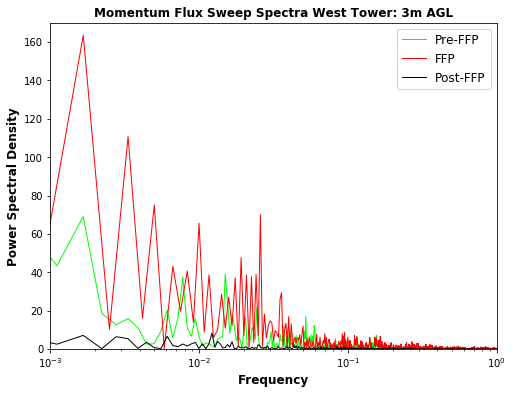

In [41]:
color = ['lime', 'r', 'k']
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for i in range(3):
    f, ps, psd = spectrum1(data[i], .1)
    ax.semilogx(f, psd, color[i], lw=1)
ax.set_ylim(0, 170)
ax.set_xlim(.001, 1)
ax.set_ylabel('Power Spectral Density', fontsize='large', fontweight='bold')
ax.set_xlabel('Frequency', fontsize='large', fontweight='bold')
ax.set_title('Momentum Flux Sweep Spectra West Tower: 3m AGL', fontweight='bold', fontsize='large')
ax.legend(['Pre-FFP', 'FFP', 'Post-FFP'], fontsize='large')

In [10]:
# from spectrum import WelchPeriodogram
# title = ['Pre-FFP', 'FFP', 'Post-FFP']
# fig, axs = plt.subplots(1, 3, figsize=(15, 4))
# for i in range(3):
#     ax = plt.subplot(1,3,i+1)
#     s = WelchPeriodogram(data[i], sampling=10, detrend='mean', label='_nolegend_')
#     Y = (np.array(s[0][1]) ** (-5/3))
#     ax.loglog(s[0][1], s[0][0], 'k-', s[0][1], Y/100, 'r--')
#     plt.title(title[i], fontweight='bold')
#     ax.legend(['3m Sweep', '$k^{-5/3}$'])

In [11]:
df = pd.read_table('./test.txt', delim_whitespace=True, names=('index', 'value'))
f, ps, psd = spectrum1(df.value.values, 1)
ps.sum()
# (ps / ps.sum()).sum()

72.69497179020682

### Test Lomb-Scargle Periodograms program

In [51]:
# xls = pd.ExcelFile('./data/PeriodMean/3m/2019_Flux_Tower-fft_3mAGL.xlsx')
# df_pre = pd.read_excel(xls, 'Pre-FFP')
# df_ffp = pd.read_excel(xls, 'FFP')
# df_pos = pd.read_excel(xls, 'Post-FFP')

In [13]:
# df1 = df_ffp.iloc[:, 0:6].dropna()
# index = (df1['Cum. Sec.'].dropna() * 10).astype(int)
# l = len(index)
# new_index = np.arange(index[0], index[l-1]+1)
# df1['index'] = index
# df1 = df1.set_index('index').reindex(new_index).reset_index()
# df1

In [52]:
# t = np.array(df_ffp['T (C)'].dropna() - df_pre['T (C)'].mean())
# w = np.array(df_ffp['W (m/s)'].dropna() - df_pre['W (m/s)'].mean())

In [53]:
# mask = np.where(np.isnan(t), True, False)
# sweep = np.where(np.logical_and(w<0, t<0), w*t, 0)
# sweep[mask] = np.nan

In [55]:
from astropy.timeseries import LombScargle
freq = np.linspace(0, 5, 9000)
power = LombScargle(df_ffp['Cum. Sec.'].dropna(), sweep, normalization='psd').power(freq)

/home/msuclass9/envs/lib/python3.8/site-packages/astropy/timeseries/periodograms/lombscargle/implementations/fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


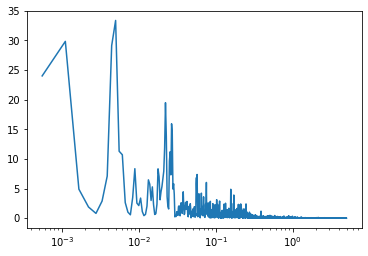

In [56]:
plt.semilogx(freq, power)